In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat kelas untuk menvisualisasi graph
class GraphVisualisasi:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  # Membuat method untuk menghubungkan node
  def addEdge(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

  # membuat method untuk menvisualisasikan graph
  def visualisasi(self):
    #menentukan lokasi node menggunakan algoritma spring layout
    pos = nx.spring_layout(self.G)
    weights = nx.get_edge_attributes(self.G, "weight")

    #menambahkan node ke graph
    self.G.add_nodes_from(self.nodes)
    plt.figure()
    #Menggambar graph dengan node dan sisi yang diberikan parameter
    nx.draw(
      self.G, pos, edge_color='black', width=2, linewidths=2,
      node_size=500, node_color='green', alpha=0.9,
      labels={node: node for node in self.G.nodes()}
    )
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
    plt.axis('off')
    plt.show()

  # Menvisualisasi Graph
  def graph_visualisasi(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.visualisasi()

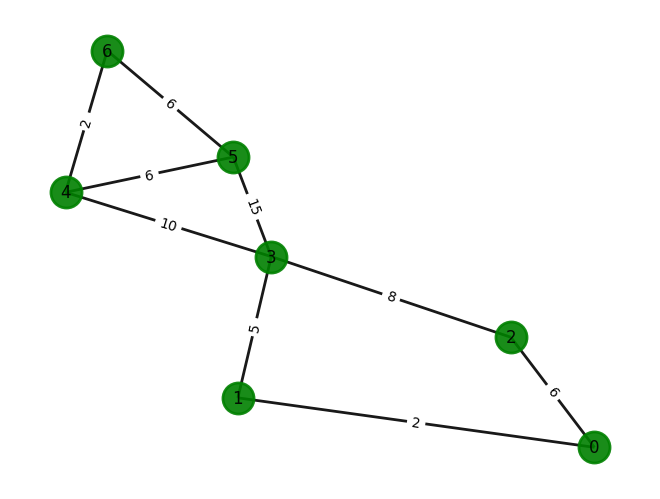

In [4]:
# Membuat graph seperti di soal C Dijkstra shortest path 2
graph = {
    '0': [{'v': '1','w': 2}, {'v': '2','w': 6}],
    '1': [{'v': '0','w': 2}, {'v': '3','w': 5}],
    '2': [{'v': '0','w': 6}, {'v': '3','w': 8}],
    '3': [{'v': '1','w': 5}, {'v': '2','w': 8}, {'v': '5','w': 15}, {'v': '4','w': 10}],
    '5': [{'v': '3','w': 15}, {'v': '4','w': 6}, {'v': '6','w': 6}],
    '4': [{'v': '3','w': 10}, {'v': '5','w': 6}, {'v': '6','w': 2}],
    '6': [{'v': '4','w': 2}, {'v': '5','w': 6}]
}

#Menvisualisasikan graph C Dijkstra shortest path 2
C_Dijkstra_shortest_path_2 = GraphVisualisasi(graph=graph)
C_Dijkstra_shortest_path_2.graph_visualisasi()


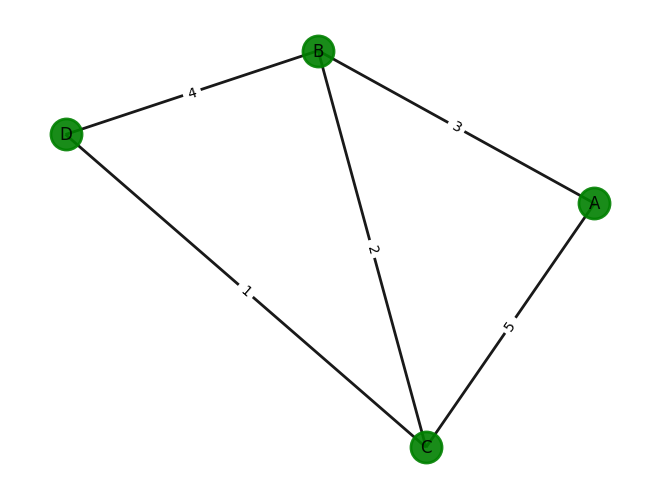

In [6]:
graph_data = {
    'A': [{'v': 'B', 'w': 3}, {'v': 'C', 'w': 5}],
    'B': [{'v': 'C', 'w': 2}, {'v': 'D', 'w': 4}],
    'C': [{'v': 'D', 'w': 1}],
    'D': []
}

graph_vis = GraphVisualisasi(graph_data)
graph_vis.graph_visualisasi()


In [5]:
#membuat fungsi untuk mendapatkan panjang lintasan
def get_path_weight(path):
  #inisialisasi awal 0
  path_weight = 0
  # path akan di looping digunakan untuk mencari berapa beban dari lintasan yang nantinya akan ditambahkan pada path_weight
  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
            path_weight += j['w']
    except:
      break

  return path_weight

#membuat fungsi untuk mencari jarak terpendek.
def findShortpath(graph, start, end, path =[]):
  path = path + [start]
  shortest = None
  weights = None

  if start == end: return path

#mencari relasi dari node.
  for node in graph[start]:
      if node['v'] not in path:
        #menampung semua kemungkinan lintasan
          newpath = findShortpath(graph, node['v'], end, path)
          #jika ada lintasan baru akan disimpan di new weight
          if newpath:
            new_weight = get_path_weight(newpath)

            #jika tdk ada weight / new weight lebiH kecil dari weights maka lintasan terpendek (shortest) akan diganti ke newpath dan beban (weights) akan diganti ke new_weight.
            if not weights or new_weight < weights:
              shortest = newpath
              weights = new_weight
  return shortest

#memanggil fungsi findShortpath dari titik 0 ke 6 dan mencari panjang lintasan.
lintasan_terpendek = findShortpath(graph, '0', '6')
panjang_lintasan = get_path_weight(lintasan_terpendek)

print('Lintasan Terpendek :', lintasan_terpendek )
print('Panjang lintasan :', panjang_lintasan)

Lintasan Terpendek : ['0', '1', '3', '4', '6']
Panjang lintasan : 19
